# IFT of pure water

First it's needed to import the necessary modules

In [1]:
import numpy as np
from SGTPy import component, saftvrmie
from SGTPy.fit import fit_cii
from SGTPy.sgt import sgt_pure
import matplotlib.pyplot as plt

First, the pure component is created with the ```component``` function. This created object is used with the ```saftvrmie``` function to create the model.

In [2]:
water = component('water', ms = 1.7311, sigma = 2.4539 , eps = 110.85,
                    lambda_r = 8.308, lambda_a = 6.,  eAB = 1991.07, rcAB = 0.5624,
                    rdAB = 0.4, sites = [0,2,2])


eos = saftvrmie(water)

The ```eos``` object includes all the necessary method for phase equilibria and interfacial properties computation.

The saturation pressure can be computed using an initial guess for the pressure. In this case the phase volumes are initiated with Topliss's method.

In [3]:
# eos.psat requires either initial guess for pressure or volume of the phases
Psat, vl, vv = eos.psat(T = 350., P0 = 5e4)
# Saturation pressure in Pa, liquid and vapor volume in m3/mol
Psat, vl, vv 

(41324.24127722169, 1.82443991915702e-05, 0.0693382700787586)

Optionally, initial volumes of the phases can be provided.

In [4]:
# eos.psat requires either initial guess for pressure or volume of the phases
Psat, vl, vv = eos.psat(T = 350., v0 = [1.82443991915702e-05, 0.0693382700787586])
Psat, vl, vv

(41324.241277004316, 1.82443991915702e-05, 0.0693382700787586)

For IFT tension computation, the influence parameters is needed. This can be fitted to experimental data.  

In [5]:
#Experimental Saturation Data of water obtained from NIST
#Saturation Temperature in Kelvin
Tsat = np.array([290., 300., 310., 320., 330., 340., 350., 360., 370., 380.]) 

#Saturation Pressure in Pa
Psat = 10**5 * np.array([0.0192  , 0.035368, 0.062311, 0.10546 , 0.17213 , 0.27188 ,
       0.41682 , 0.62194 , 0.90535 , 1.2885  ])

#Saturated Liquid density in mol/m3
rhol = 10**6 * np.array([0.05544 , 0.055315, 0.055139, 0.054919, 0.054662, 0.054371,
       0.054049, 0.053698, 0.053321, 0.052918]) 

#Interfacial Tension in mN/m
Tension = np.array([73.21 , 71.686, 70.106, 68.47 , 66.781, 65.04 , 63.248, 61.406,
       59.517, 57.581])

In [6]:
# Create empty arrays to store computed saturation pressure
# Tsat, Psat, rhol, rhov are experimetal data obtained from NIST
Psaft = np.zeros_like(Psat) 
vlsaft = np.zeros_like(rhol)
vvsaft = np.zeros_like(rhol)
n= len(Psat)
for i in range(n):
    # Saturation pressure in Pa, liquid and vapor volume in m3/mol
    Psaft[i], vlsaft[i], vvsaft[i] = eos.psat(T = Tsat[i], P0 = Psat[i])
rhosaftl = 1/vlsaft
rhosaftv = 1/vvsaft

In [7]:
# Tension are the experimental infertacial tension in mN/m obtained from NIST
# fit_cii requires the computed saturacion points
fit_cii(Tension, Tsat, Psaft, rhosaftl, rhosaftv, eos)

1.5371939422641703e-20

In [8]:
# The pure component is defined with the influence parameter
water = component('water', ms = 1.7311, sigma = 2.4539 , eps = 110.85,
                    lambda_r = 8.308, lambda_a = 6., eAB = 1991.07, rcAB = 0.5624,
                    rdAB = 0.4, sites = [0,2,2], cii = 1.5371939422641703e-20)
eos = saftvrmie(water)

In [9]:
# array to store computen interfacial tension
tensaft = np.zeros_like(Tension)
for i in range(n):
    # interfacial tension result is outputed in mN/m
    tensaft[i] = sgt_pure(rhosaftv[i], rhosaftl[i], Tsat[i], Psaft[i], eos)

Text(0, 0.5, '$\\gamma$  / mN m$^{-1}$')

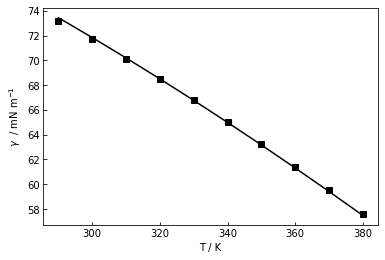

In [10]:
plt.plot(Tsat, tensaft, color = 'k')
plt.plot(Tsat, Tension, 's', color = 'k')
plt.tick_params(direction = 'in')
plt.xlabel(r'T / K')
plt.ylabel(r'$\gamma$  / mN m$^{-1}$')